In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
import seaborn as sns

In [6]:
df = pd.read_csv("csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [7]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 2646
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.1+ MB


In [8]:
#min number of samples per class to be 50
df_modified_50 = df[df[0].map(df[0].value_counts()) >= 50]
df_modified_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 2641
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [9]:
df_modified_50[0].unique().shape

(12,)

In [10]:

Features = df_modified_50.drop(0,axis = 1)
print(Features.shape)
target = df_modified_50[0]
print(target.shape)

(1560, 3248)
(1560,)


In [11]:
Features_all=Features.loc[:,:]
Features_HoG_95 = Features.loc[:,:946]
Features_CNN = Features.loc[:,946:2993]
Features_LBP = Features.loc[:,2993:]

In [12]:
print("No of CNN features: ",Features_CNN.shape[1])
print("No of HoG features covering 0.95 variance: ",Features_HoG_95.shape[1])
print("No of LBP Features are: ",Features_LBP.shape[1])

No of CNN features:  2048
No of HoG features covering 0.95 variance:  946
No of LBP Features are:  256


In [25]:



## training the model on hog features 

X = df_modified_50.iloc[:, 1:945]  
y = df_modified_50.iloc[:, 0]      

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler,'standard_scaler.joblib')

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled , y_train)

# Predict labels for the test set
y_pred = nb_model.predict(X_test_scaled )

joblib.dump(nb_model,'gaussian.joblib')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of gaussianNB model on hog features :", accuracy)

Accuracy of gaussianNB model on hog features : 0.6442307692307693


In [26]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.86      0.43      0.57        14
     Colin_Powell       0.81      0.83      0.82        47
  Donald_Rumsfeld       0.93      0.45      0.61        31
    George_W_Bush       0.48      0.99      0.65        92
Gerhard_Schroeder       0.89      0.38      0.53        21
      Hugo_Chavez       1.00      0.24      0.38        21
   Jacques_Chirac       1.00      0.31      0.47        13
    Jean_Chretien       1.00      0.18      0.31        11
    John_Ashcroft       1.00      0.08      0.15        12
Junichiro_Koizumi       1.00      0.65      0.79        17
  Serena_Williams       1.00      0.38      0.55         8
       Tony_Blair       0.94      0.68      0.79        25

         accuracy                           0.64       312
        macro avg       0.91      0.47      0.55       312
     weighted avg       0.79      0.64      0.62       312



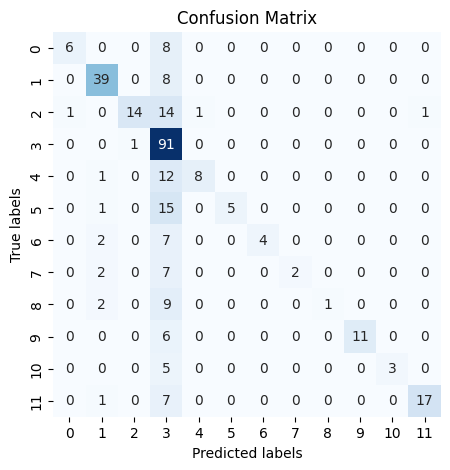

In [27]:

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
## training the model on cnn features 

X = df_modified_50.iloc[:, 945:2993]  
y = df_modified_50.iloc[:, 0]      

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

joblib.dump(scaler,'standard_scaler.joblib')

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled , y_train)

# Predict labels for the test set
y_pred = nb_model.predict(X_test_scaled )

joblib.dump(nb_model,'gaussian.joblib')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of gaussianNB model on cnn features :", accuracy)

Accuracy of gaussianNB model on cnn features : 0.33974358974358976


In [29]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.50      0.64      0.56        14
     Colin_Powell       0.29      0.34      0.31        47
  Donald_Rumsfeld       0.69      0.29      0.41        31
    George_W_Bush       0.45      0.42      0.44        92
Gerhard_Schroeder       0.25      0.19      0.22        21
      Hugo_Chavez       0.33      0.38      0.36        21
   Jacques_Chirac       0.07      0.08      0.07        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.25      0.25      0.25        12
Junichiro_Koizumi       0.23      0.18      0.20        17
  Serena_Williams       0.83      0.62      0.71         8
       Tony_Blair       0.23      0.36      0.28        25

         accuracy                           0.34       312
        macro avg       0.34      0.31      0.32       312
     weighted avg       0.37      0.34      0.34       312



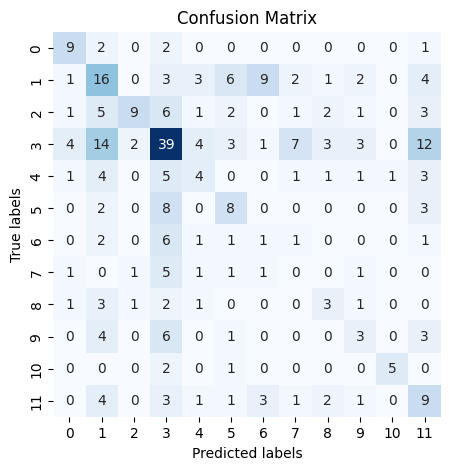

In [30]:

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:



## training the model on lbp features 

X = df_modified_50.iloc[:, 2993:3249]  
y = df_modified_50.iloc[:, 0]      

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler,'standard_scaler.joblib')

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled , y_train)

# Predict labels for the test set
y_pred = nb_model.predict(X_test_scaled )

joblib.dump(nb_model,'gaussian.joblib')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of gaussianNB model on lbp features :", accuracy)

Accuracy of gaussianNB model on lbp features : 0.16025641025641027


In [32]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.15      0.43      0.22        14
     Colin_Powell       0.35      0.26      0.30        47
  Donald_Rumsfeld       0.12      0.10      0.11        31
    George_W_Bush       0.65      0.16      0.26        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.15      0.29      0.20        21
   Jacques_Chirac       0.06      0.08      0.07        13
    Jean_Chretien       0.03      0.18      0.06        11
    John_Ashcroft       0.12      0.08      0.10        12
Junichiro_Koizumi       0.10      0.06      0.07        17
  Serena_Williams       0.08      0.38      0.14         8
       Tony_Blair       0.00      0.00      0.00        25

         accuracy                           0.16       312
        macro avg       0.15      0.17      0.13       312
     weighted avg       0.29      0.16      0.17       312



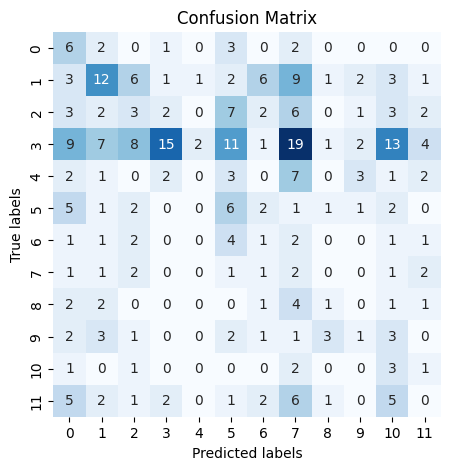

In [33]:

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:



## training the model on all features 

X = df_modified_50.iloc[:, 1:3249]  
y = df_modified_50.iloc[:, 0]      

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler,'standard_scaler.joblib')

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled , y_train)

# Predict labels for the test set
y_pred = nb_model.predict(X_test_scaled )

joblib.dump(nb_model,'gaussian.joblib')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of gaussianNB model on all features :", accuracy)

Accuracy of gaussianNB model on all features : 0.34294871794871795


In [35]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.47      0.57      0.52        14
     Colin_Powell       0.28      0.36      0.32        47
  Donald_Rumsfeld       0.69      0.29      0.41        31
    George_W_Bush       0.45      0.45      0.45        92
Gerhard_Schroeder       0.21      0.14      0.17        21
      Hugo_Chavez       0.36      0.38      0.37        21
   Jacques_Chirac       0.07      0.08      0.07        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.25      0.25      0.25        12
Junichiro_Koizumi       0.27      0.18      0.21        17
  Serena_Williams       1.00      0.62      0.77         8
       Tony_Blair       0.22      0.36      0.27        25

         accuracy                           0.34       312
        macro avg       0.36      0.31      0.32       312
     weighted avg       0.38      0.34      0.35       312



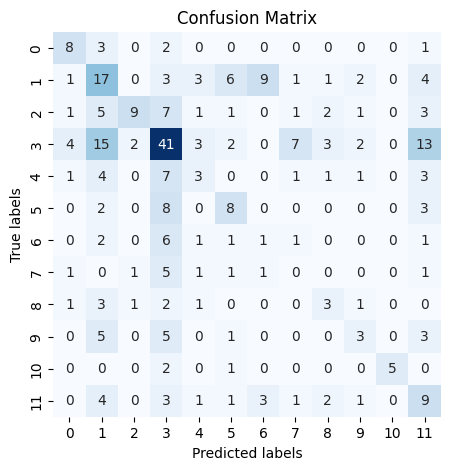

In [36]:

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()